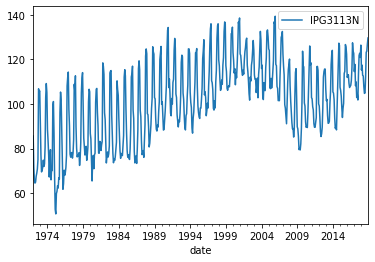

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)
candy.head()

candy.plot()
plt.show()

In [2]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


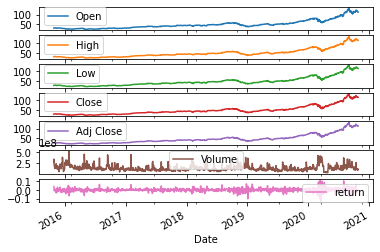

In [2]:
price = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
price['return'] = price['Adj Close'].pct_change()
price.head()

price.plot(subplots=True)
plt.show()

In [4]:
price.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2019-10-07,56.567501,57.482498,56.459999,56.764999,56.207317,122306000,NaN
2019-10-08,56.455002,57.014999,56.082500,56.099998,55.548851,111820000,-0.011715
2019-10-09,56.757500,56.947498,56.410000,56.757500,56.199894,74770400,0.011720
2019-10-10,56.982498,57.610001,56.825001,57.522499,56.957375,113013600,0.013478
2019-10-11,58.237499,59.410000,58.077499,59.052502,58.472343,166795600,0.026598


Make the train-test splits

candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

fig, ax = plt.subplots()
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

# Test for stationarity 

check for stationarity using augmented Dicky-Fuller test

0th element in result is the test statistic (better be more negative),
1st element is a p-value (if p-value is small, then reject null hypothesis, i.e. reject non-stationary),
4th element is a set of critical values for the test statistic at the 1 %, 5 %, and 10 % levels

In [3]:
##### Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(candy)

print(result)

(-1.7760153075016125, 0.3924327500713993, 14, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3094.828881317046)


If time series is nonstationary, then take the difference

In [6]:
# Calculate the first difference and drop the nans
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()

# Run test and print
result_diff = adfuller(candy_diff)
print(result_diff)

(-6.175912489755648, 6.631549159335912e-08, 13, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3091.312358309139)


Or use a logarythmic transformation

In [7]:
# Calculate log-return and drop nans
candy_log = np.log(candy/candy.shift(1))
candy_log = candy_log.dropna()

# Run test and print
result_log = adfuller(candy_log)
print(result_log)

(-6.44263945374219, 1.59407238991006e-08, 14, 548, {'1%': -3.442339408568417, '5%': -2.866828612425054, '10%': -2.5695866531248335}, -1852.8831449571094)


# Sample generation

In [8]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample

MA(1) model with MA lag-1 coefficient of -0.7.

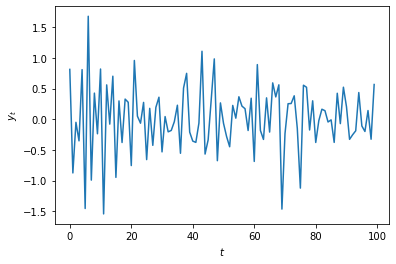

In [9]:
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1,-0.7]

# Generate data
y1 = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y1)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 

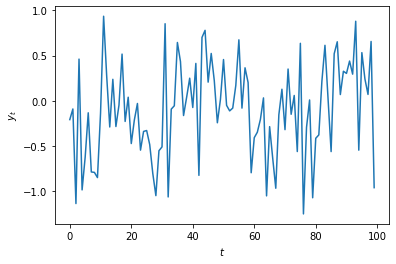

In [10]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1,-0.3,-0.2]
ma_coefs = [1]

# Generate data
y2 = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y2)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

ARMA(1,2) model

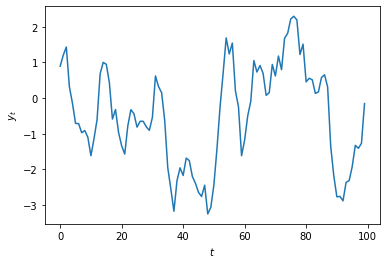

In [11]:
np.random.seed(3)

# Set coefficients
ar_coefs = [1,-0.8]
ma_coefs = [1,0.3,0.4]

# Generate data
y3 = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y3)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

# Fitting the model

In [12]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y3, order=(1,2))

# Fit the model
results = model.fit()

print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 2)   Log Likelihood                 -79.136
Method:                       css-mle   S.D. of innovations              0.528
Date:                Fri, 16 Oct 2020   AIC                            168.272
Time:                        11:26:45   BIC                            181.298
Sample:                             0   HQIC                           173.544
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4130      0.416     -0.993      0.321      -1.228       0.402
ar.L1.y        0.7780      0.072     10.881      0.000       0.638       0.918
ma.L1.y        0.3516      0.104      3.382      0.0

In [13]:
# Instantiate the model
model = ARMA(y3, order=(2,1))

# Fit the model
results = model.fit()

print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 1)   Log Likelihood                 -82.787
Method:                       css-mle   S.D. of innovations              0.548
Date:                Fri, 16 Oct 2020   AIC                            175.573
Time:                        11:26:45   BIC                            188.599
Sample:                             0   HQIC                           180.845
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4251      0.346     -1.229      0.219      -1.103       0.253
ar.L1.y        1.5167      0.139     10.873      0.000       1.243       1.790
ar.L2.y       -0.6204      0.128     -4.851      0.0

ARMAX model fitting

In [14]:
model1 = ARMA(price['Close'], order=(1,1),exog=price['Volume'])

# Fit the model
results1 = model1.fit()

# Print model fit summary
print(results1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  251
Model:                     ARMA(1, 1)   Log Likelihood                -567.471
Method:                       css-mle   S.D. of innovations              2.302
Date:                Fri, 16 Oct 2020   AIC                           1144.942
Time:                        11:26:45   BIC                           1162.569
Sample:                             0   HQIC                          1152.035
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          75.7384     18.374      4.122      0.000      39.725     111.752
Volume      -2.954e-09   4.32e-08     -0.068      0.945   -8.76e-08    8.17e-08
ar.L1.Close     0.9940      0.007    136.148    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Sarimax model

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create ARMA(2,2) model
sarimax_model = SARIMAX(candy_diff, order=(2,0,2))

# Fit model
sarimax_results = sarimax_model.fit()

# Print fit summary
print(sarimax_results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               IPG3113N   No. Observations:                  563
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1985.457
Date:                Thu, 29 Oct 2020   AIC                           3980.913
Time:                        13:54:30   BIC                           4002.580
Sample:                    02-01-1972   HQIC                          3989.371
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1839      0.080     -2.295      0.022      -0.341      -0.027
ar.L2         -0.4876      0.077     -6.309      0.000      -0.639      -0.336
ma.L1          0.4285      0.051      8.389      0.0

# Forecasting

In [16]:
# Last 30 days will be taken for forecasting
n=30

In [17]:
# Generate predictions
one_step_forecast = sarimax_results.get_prediction(start=-n)

# Extract prediction mean
mean_one_step_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower IPG3113N']
upper_limits = confidence_intervals.loc[:,'upper IPG3113N']

# Print best estimate  predictions
print(mean_one_step_forecast)

2016-07-01    2.612240
2016-08-01    0.807348
2016-09-01   -1.749585
2016-10-01    2.143100
2016-11-01    4.980720
2016-12-01   -1.301425
2017-01-01   -4.784306
2017-02-01    0.803970
2017-03-01    1.723957
2017-04-01   -2.732096
2017-05-01   -2.709112
2017-06-01    2.135261
2017-07-01   -0.529452
2017-08-01   -1.639149
2017-09-01    3.147683
2017-10-01    5.560947
2017-11-01   -2.089548
2017-12-01   -3.672489
2018-01-01    4.016104
2018-02-01    0.161188
2018-03-01   -6.154008
2018-04-01    2.065700
2018-05-01    2.539630
2018-06-01   -3.990828
2018-07-01   -2.528879
2018-08-01    3.385549
2018-09-01    2.424418
2018-10-01    1.174974
2018-11-01    1.024969
2018-12-01   -0.403284
Freq: MS, dtype: float64


Plot the forecast

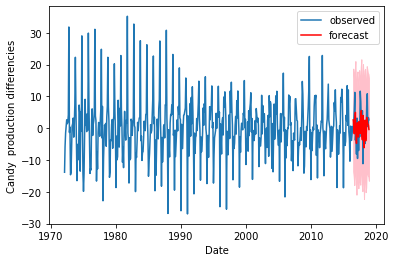

In [18]:
# plot the data
plt.plot(candy_diff.index, candy_diff, label='observed')

# plot your mean predictions
plt.plot(mean_one_step_forecast.index, mean_one_step_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Candy  production differencies')
plt.legend()
plt.show()

Dynamic predictions

In [19]:
# Generate predictions
dynamic_forecast = sarimax_results.get_prediction(start=-n, dynamic=True)

# Extract prediction mean
mean_dynamic_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits_d = confidence_intervals.loc[:,'lower IPG3113N']
upper_limits_d = confidence_intervals.loc[:,'upper IPG3113N']

# Print best estimate predictions
print(mean_dynamic_forecast)

2016-07-01    2.612240
2016-08-01    1.316622
2016-09-01   -1.515716
2016-10-01   -0.363251
2016-11-01    0.805798
2016-12-01    0.028950
2017-01-01   -0.398201
2017-02-01    0.059100
2017-03-01    0.183282
2017-04-01   -0.062514
2017-05-01   -0.077868
2017-06-01    0.044797
2017-07-01    0.029729
2017-08-01   -0.027307
2017-09-01   -0.009474
2017-10-01    0.015056
2017-11-01    0.001851
2017-12-01   -0.007681
2018-01-01    0.000510
2018-02-01    0.003651
2018-03-01   -0.000920
2018-04-01   -0.001611
2018-05-01    0.000745
2018-06-01    0.000649
2018-07-01   -0.000482
2018-08-01   -0.000228
2018-09-01    0.000277
2018-10-01    0.000060
2018-11-01   -0.000146
2018-12-01   -0.000002
Freq: MS, dtype: float64


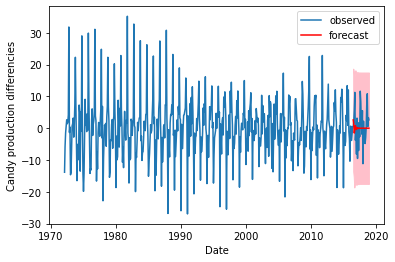

In [20]:
# plot the data
plt.plot(candy_diff.index, candy_diff, label='observed')

# plot your mean predictions
plt.plot(mean_dynamic_forecast.index, mean_dynamic_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits_d.index, lower_limits_d, 
               upper_limits_d, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Candy production differencies')
plt.legend()
plt.show()

In [21]:
# Integrate the difference forecast
int_one_step_forecast = np.cumsum(mean_one_step_forecast)

# Make absolute value forecast
value_one_step_forecast = int_one_step_forecast + candy.iloc[-n+1,0]

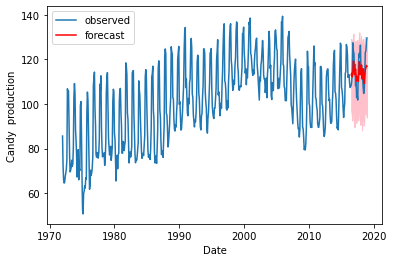

In [22]:
# plot the data
plt.plot(candy.index, candy, label='observed')

# plot your mean predictions
plt.plot(value_one_step_forecast.index, value_one_step_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits + candy.iloc[-n+1,0], 
               upper_limits + candy.iloc[-n+1,0], color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Candy  production')
plt.legend()
plt.show()

In [23]:
# Integrate the difference forecast
int_dynamic_forecast = np.cumsum(mean_dynamic_forecast)

# Make absolute value forecast
value_dynamic_forecast = int_dynamic_forecast + candy.iloc[-n+1,0]

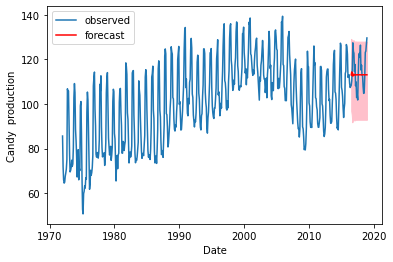

In [24]:
# plot the data
plt.plot(candy.index, candy, label='observed')

# plot your mean predictions
plt.plot(value_dynamic_forecast.index, value_dynamic_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits_d.index, lower_limits_d + candy.iloc[-n+1,0], 
               upper_limits_d + candy.iloc[-n+1,0], color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Candy  production')
plt.legend()
plt.show()

# Choice of the better model

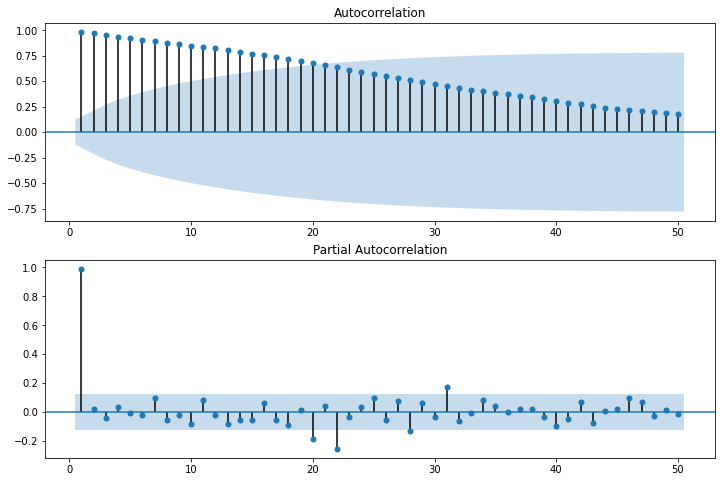

In [25]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(price['Close'], lags=50, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(price['Close'], lags=50, zero=False, ax=ax2)

plt.show()

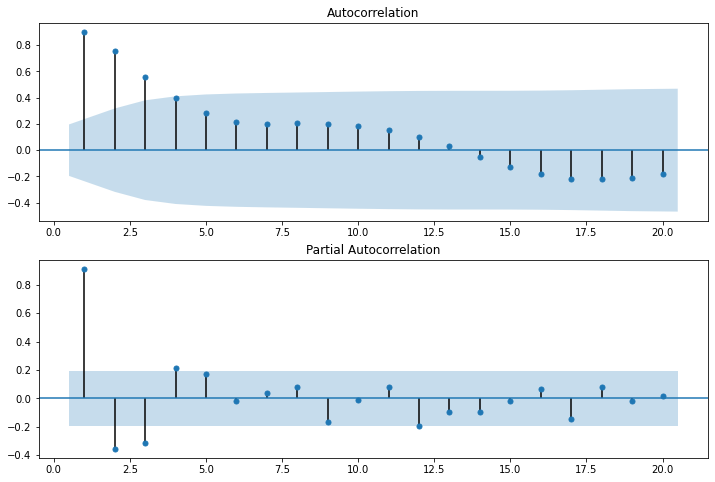

In [26]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(y3, lags=20, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(y3, lags=20, zero=False, ax=ax2)

plt.show()

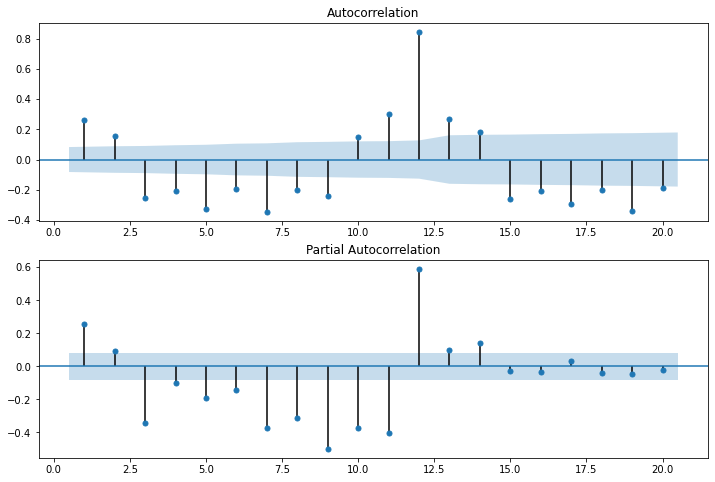

In [27]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(candy_diff, lags=20, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(candy_diff, lags=20, zero=False, ax=ax2)

plt.show()

In [28]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(y3, order=(p,0,q))
        results2 = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results2.aic, results2.bic))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [29]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
5  1  2  167.162435  177.583115
8  2  2  168.765282  181.791133
7  2  1  174.877853  185.298534
6  2  0  176.126143  183.941654
4  1  1  180.828116  188.643627
3  1  0  185.323638  190.533978
2  0  2  218.444438  226.259948
1  0  1  278.020299  283.230640
0  0  0  364.525881  367.131052
   p  q         AIC         BIC
5  1  2  167.162435  177.583115
8  2  2  168.765282  181.791133
6  2  0  176.126143  183.941654
7  2  1  174.877853  185.298534
4  1  1  180.828116  188.643627
3  1  0  185.323638  190.533978
2  0  2  218.444438  226.259948
1  0  1  278.020299  283.230640
0  0  0  364.525881  367.131052


# Model diagnostics

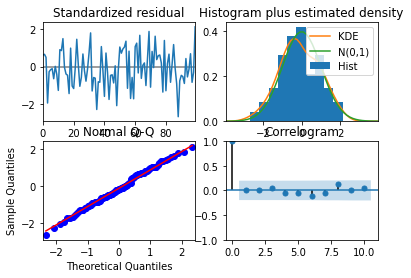

In [30]:
# Fit model
model3 = SARIMAX(y3, order=(1,0,2))
results3 = model3.fit()

# Create the 4 diagostics plots
results3.plot_diagnostics()
plt.show()

# Seasonal component

In [31]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

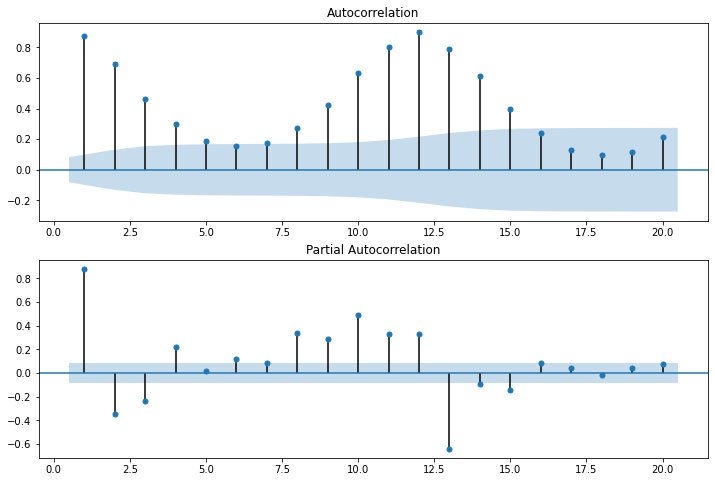

In [32]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(candy, lags=20, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(candy, lags=20, zero=False, ax=ax2)

plt.show()

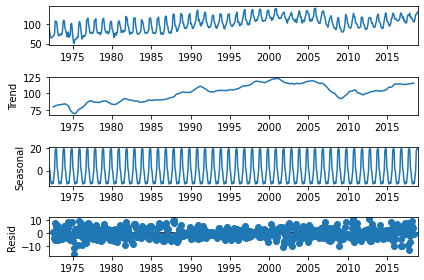

In [33]:
# Perform additive decomposition
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
decomp = seasonal_decompose(candy, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [34]:
# Create a SARIMAX model
model_s = SARIMAX(candy, order=(1,0,5), seasonal_order=(1,1,0,12))

# Fit the model
results_s = model_s.fit()

# Print the results summary
print(results_s.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                            IPG3113N   No. Observations:                  564
Model:             SARIMAX(1, 0, 5)x(1, 1, [], 12)   Log Likelihood               -1550.922
Date:                             Fri, 16 Oct 2020   AIC                           3117.844
Time:                                     11:26:50   BIC                           3152.352
Sample:                                 01-01-1972   HQIC                          3131.327
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8935      0.038     23.406      0.000       0.819       0.968
ma.L1         -0.2470      

In [35]:
# Create model object
model_trend = SARIMAX(candy, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend='c')
# Fit model
results_trend = model_trend.fit()
print(results_trend.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                           IPG3113N   No. Observations:                  564
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1518.519
Date:                            Fri, 16 Oct 2020   AIC                           3047.038
Time:                                    11:26:51   BIC                           3068.596
Sample:                                01-01-1972   HQIC                          3055.462
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.011      0.070      0.944      -0.021       0.023
ar.L1          0.4725      0.087   

In [36]:
forecast_trend_object = results_trend.get_forecast(12)

# Extract predicted mean attribute
mean_trend = forecast_trend_object.predicted_mean

# Calculate the confidence intervals
conf_int_trend = forecast_trend_object.conf_int()

# Extract the forecast dates
dates = mean_trend.index

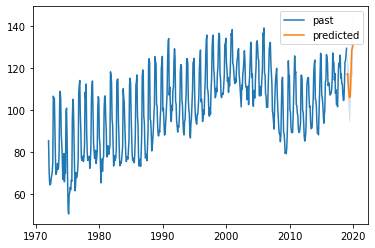

In [37]:
plt.figure()

# Plot past CO2 levels
plt.plot(candy.index, candy, label='past')

# Plot the prediction means as line
plt.plot(dates, mean_trend, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int_trend.iloc[:,0], conf_int_trend.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()